In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle


In [2]:
df=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\DJIA\\DJIA(ClosingVal-today).csv")

In [29]:
df.head()

,Open,High,Low,Volume,Close
0,11729.66992,11867.11035,11675.53027,183190000,11734.32031
1,11781.70020,11782.34961,11601.51953,173590000,11782.34961
2,11632.80957,11633.78027,11453.33984,182550000,11642.46973
3,11532.07031,11718.28027,11450.88965,159790000,11532.95996
4,11611.20996,11709.88965,11599.73047,215040000,11615.92969


In [30]:
df.tail()

,Open,High,Low,Volume,Close
1983,17355.21094,17355.21094,17063.08008,138740000,17400.75000
1984,17190.50977,17409.72070,17190.50977,112190000,17140.24023
1985,17456.01953,17704.50977,17456.01953,106380000,17409.72070
1986,17712.75977,17930.60938,17711.80078,133030000,17694.67969
1987,17924.24023,18002.38086,17916.91016,82160000,17929.99023


In [31]:
df.isna().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [32]:
df.shape

(1988, 5)

In [35]:
# del df['Date']

In [36]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
xtrain.shape

(1590, 4)

In [39]:
ytrain.shape

(1590,)

In [40]:
xtest.shape

(398, 4)

In [41]:
ytest.shape

(398,)

### LASSO

In [42]:
from sklearn.linear_model import Lasso

In [43]:
ls = Lasso()
ls.fit(xtrain, ytrain)

Lasso()

In [44]:
ls_predictions = ls.predict(xtest)
ls_predictions

array([15528.80807197, 10731.11687238, 15697.90524421,  8275.07529194,
       15307.59729404, 17765.1593379 , 17830.31705234, 18105.98841248,
       12584.47866947, 16258.34129884,  8865.89309178, 18011.83528946,
       12791.64627894, 11458.95366362,  7933.76053714, 15804.3232945 ,
       11430.26106503, 13172.04150256, 11874.38365255, 10397.75747398,
       17649.39307407,  9286.50597347, 17821.09304695, 17169.89233655,
       18035.43761463, 11046.75494553, 10368.35916358, 16424.20617914,
       16295.73267669, 18116.05227618, 16584.81616657,  8800.07014327,
       15974.18176672,  9063.8840731 , 14844.46707255, 12454.45661712,
       17449.6559074 ,  8668.06503605, 13472.0684964 , 17485.3278624 ,
       13228.98002272, 14701.31457964, 15194.40644017, 17082.19354698,
       17118.94970782, 11124.07084045, 16449.40988086, 16869.59600703,
       12423.94848956, 13254.31819123, 10195.60867737, 17667.91219765,
       13566.00730389, 11977.87243721, 16805.3965787 ,  9973.69382213,
      

In [45]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [46]:
def MAPE(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Absolute Percentage Error """
    mape = np.mean(np.abs((ytest - predicted)/ytest))*100
    return mape

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ls_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ls_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ls_predictions)))
print('Mean Directional Accuracy:', mda(ytest, ls_predictions))
print('Mean Absolute Percentage Error:', MAPE(ytest,ls_predictions))

e = MAPE(ytest,ls_predictions)
print('%.2f'%e)

Mean Absolute Error: 3.819203274737504
Mean Squared Error: 48.694020754371714
Root Mean Squared Error: 6.978110113373944
Mean Directional Accuracy: 1.0
Mean Absolute Percentage Error: 0.02714149108141067
0.03


### Predicting for 25th March

In [48]:
ls.predict([[32346.81,32672.69,32071.41,411990000]])

array([32343.98628365])

### Graph

In [49]:
import matplotlib.pyplot as plt

In [50]:
newdf=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [51]:
newdf.head()

,Date,Open,High,Low,Volume,Close
0,3/25/2021,32346.81,32672.69,32071.41,411990000.0,32619.48
1,3/26/2021,32681.07,33098.83,32681.07,382170000.0,33072.88
2,3/29/2021,33087.55,33259.00,32905.13,351610000.0,33171.37
3,3/30/2021,33127.88,33170.93,32988.92,307510000.0,33066.96
4,3/31/2021,33116.04,33173.77,32980.57,414140000.0,32981.55


In [52]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [53]:
predictions = ls.predict(newxval)

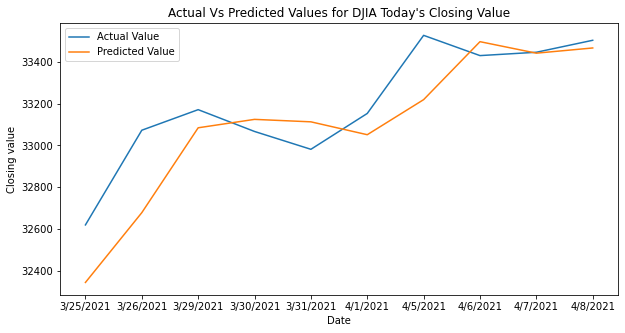

In [54]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Today's Closing Value")
plt.legend()

In [28]:
pickle.dump(ls, open("DWJA_todaysPrediction.pkl", 'wb'))
print('model saved...')

model saved...


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [25]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([15533.0001473 , 10740.1435455 , 15672.6342489 ,  8272.10095665,
       15303.6234895 , 17761.3890066 , 17836.7106637 , 18100.5009578 ,
       12580.9797674 , 16274.2086342 ,  8800.73554688, 18012.0652753 ,
       12792.9561929 , 11468.2539364 ,  7925.71174833, 15820.3677907 ,
       11435.1563083 , 13162.7822776 , 11868.9047275 , 10404.6503422 ,
       17653.6634371 ,  9276.46470717, 17827.6371894 , 17147.1094918 ,
       18035.3268961 , 11047.7450284 , 10372.9346012 , 16433.2646683 ,
       16288.9386914 , 18119.6854486 , 16573.3283196 ,  8790.46645503,
       15967.7241886 ,  9093.56717796, 14835.0944555 , 12457.0734201 ,
       17424.3994703 ,  8694.18532207, 13480.8529784 , 17481.0642582 ,
       13241.5695516 , 14709.2664588 , 15184.7631749 , 17079.5270321 ,
       17114.2146099 , 11123.9856547 , 16438.750916  , 16858.1725205 ,
       12416.254726  , 13249.4006052 , 10194.5853999 , 17658.2355085 ,
       13579.7614548 , 11984.0326747 , 16805.8277918 ,  9974.71372079,
      

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))
print ('Mean Absolute Percentage Error:', MAPE(ytest,rf_predictions))

Mean Absolute Error: 9.168108299195753
Mean Squared Error: 217.27408063877132
Root Mean Squared Error: 14.740219830069405
Mean Directional Accuracy: 1.0
Mean Absolute Percentage Error: 0.07431332384859454


In [33]:
ls.predict([[33526.19,33810.87,33526.19,316410000]])

array([33523.08966862])

In [32]:
rf.predict([[33526.19,33810.87,33526.19,316410000]])

array([18299.1793575])